Model to determine chance of youth getting in trouble at school (p6b39) given...
- whether or not they feel safe at school (k6b1d)
- youth's living arrangements (cp6yloth)
- headaches (p6b16)
- primary caregiver's education (cp6edu)
- days per week they eat with the family (k6c3)

also consider predicting closeness to bio parents
- father(k6c28)
- mother (k6c17)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def corr (x, y):
    print(x+' and '+y+' are corr by '+str(df[x+'_int'].corr(df[y+'_int'])))

df_1=pd.merge(pd.read_csv("FF_Processed_Data_a.csv"),(pd.read_csv("FF_Processed_Data_b.csv")),on='idnum')
print('pair 1...')
df_2=pd.merge((pd.read_csv("FF_Processed_Data_c.csv")),(pd.read_csv("FF_Processed_Data_d.csv")),on='idnum')
print('pair 2...')
df_3=pd.merge(df_1,df_2,on='idnum')
print('pair 3...')
df_4=pd.merge(df_3,(pd.read_csv("FF_Processed_Data_e.csv")),on='idnum')
print('almost...')

df=df_4=pd.merge(df_4,(pd.read_csv("FF_Processed_Data_addi.csv")),on='idnum')
print('Done!')

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


pair 1...
pair 2...
pair 3...
almost...
Done!


In [2]:
cf=df[['p6b39_int', 'k6c28_int', 'k6c17_int', 'k6b1d_int', 'k6c3_int', 'p6b16_int', 'cp6edu_int', 'cp6yloth_int']]
cf=cf.dropna()
cf.k6b1d_int=(4-cf.k6b1d_int)/3
cf.cp6edu_int=(4-cf.cp6edu_int)/3
cf.k6c3_int=cf.k6c3_int/7
cf.p6b16_int=2-cf.p6b16_int

cf.p6b39_int=2-cf.p6b39_int
cf.k6c17_int=(4-cf.k6c17_int)/3
cf.k6c28_int=(4-cf.k6c28_int)/3

liv_sit=cf.pop('cp6yloth_int')
cf['LivWth_mom'] = (liv_sit == 1)*1.0
cf['LivWth_dad'] = (liv_sit == 2)*1.0
cf['LivWth_mgp'] = (liv_sit == 3)*1.0
cf['LivWth_pgp'] = (liv_sit == 4)*1.0
cf['LivWth_rel'] = (liv_sit == 5)*1.0
cf['LivWth_foster'] = (liv_sit == 7)*1.0
cf['LivWth_other'] = (liv_sit == 8)*1.0

cf

p6b39_int  k6c28_int  k6c17_int  k6b1d_int  k6c3_int  p6b16_int  \
0          1.0   1.000000   1.000000   1.000000  1.000000        1.0   
1          1.0   1.000000   1.000000   1.000000  0.428571        0.0   
2          1.0   0.000000   0.000000   1.000000  0.714286        0.0   
5          0.0   0.000000   1.000000   1.000000  1.000000        0.0   
6          0.0   0.000000   0.000000   1.000000  0.000000        0.0   
7          1.0   1.000000   1.000000   1.000000  1.000000        0.0   
8          0.0   0.666667   1.000000   1.000000  0.714286        0.0   
9          1.0   0.333333   1.000000   1.000000  0.285714        0.0   
10         1.0   0.000000   0.666667   1.000000  1.000000        0.0   
12         1.0   0.666667   1.000000   1.000000  0.428571        1.0   
13         1.0   0.000000   1.000000   1.000000  0.285714        0.0   
14         0.0   1.000000   0.333333   0.333333  0.000000        0.0   
16         1.0   1.000000   1.000000   1.000000  1.000000        1.0   
19         1.0   0.333333   1.000000   0.666667  0.857143        0.0   
20         0.0   0.333333   0.666667   1.000000  1.000000        0.0   
21         1.0   0.000000   0.666667   0.000000  1.000000        0.0   
22         1.0   0.000000   0.000000   1.000000  1.000000        0.0   
24         1.0   1.000000   0.000000   1.000000  1.000000        0.0   
28         1.0   0.333333   1.000000   0.666667  0.428571        0.0   
29         1.0   0.333333   1.000000   1.000000  0.285714        0.0   
30         1.0   1.000000   0.666667   1.000000  1.000000        0.0   
31         0.0   0.666667   1.000000   0.666667  0.428571        0.0   
32         0.0   0.333333   0.666667   1.000000  1.000000        0.0   
34         1.0   0.000000   1.000000   1.000000  1.000000        0.0   
35         1.0   0.333333   1.000000   1.000000  1.000000        0.0   
37         1.0   0.333333   1.000000   1.000000  1.000000        0.0   
38         0.0   1.000000   0.333333   1.000000  0.000000        0.0   
39         1.0   0.333333   1.000000   1.000000  0.714286        0.0   
41         1.0   0.666667   0.666667   0.666667  0.428571        0.0   
43         1.0   1.000000   1.000000   0.666667  0.857143        0.0   
..         ...        ...        ...        ...       ...        ...   
293        1.0   0.333333   1.000000   0.666667  1.000000        0.0   
294        1.0   1.000000   1.000000   1.000000  1.000000        0.0   
295        1.0   0.666667   0.333333   0.666667  1.000000        0.0   
296        1.0   0.000000   0.666667   1.000000  0.857143        0.0   
297        1.0   0.666667   1.000000   0.666667  0.714286        0.0   
299        1.0   0.666667   0.000000   1.000000  0.285714        0.0   
300        1.0   1.000000   1.000000   1.000000  1.000000        0.0   
301        1.0   0.000000   1.000000   1.000000  1.000000        0.0   
303        1.0   0.666667   1.000000   1.000000  0.142857        0.0   
304        1.0   1.000000   1.000000   0.666667  0.714286        0.0   
305        1.0   1.000000   0.666667   1.000000  0.285714        0.0   
306        0.0   0.666667   0.000000   0.666667  1.000000        0.0   
307        1.0   1.000000   0.666667   0.666667  0.571429        0.0   
308        1.0   0.333333   1.000000   1.000000  1.000000        0.0   
309        1.0   0.333333   1.000000   1.000000  0.714286        0.0   
310        1.0   0.666667   0.666667   0.000000  0.000000        0.0   
311        0.0   1.000000   0.000000   0.666667  1.000000        0.0   
312        1.0   0.666667   1.000000   0.666667  0.428571        0.0   
313        1.0   1.000000   1.000000   1.000000  1.000000        1.0   
314        1.0   1.000000   1.000000   1.000000  1.000000        1.0   
315        1.0   0.666667   0.666667   1.000000  0.857143        0.0   
316        1.0   0.000000   1.000000   1.000000  1.000000        0.0   
317        0.0   0.000000   0.666667   1.000000  0.285714        0.0   
318        1.0   0.000000   1.000000   1.0000

In [3]:
school_labels=list(cf.pop('p6b39_int'))
dad_labels=list(cf.pop('k6c28_int'))
mom_labels=list(cf.pop('k6c17_int'))

answers=[(school_labels[x], dad_labels[x], mom_labels[x]) for x in range(len(school_labels))]

In [4]:
model = keras.Sequential([
    layers.Dense(24, activation=tf.nn.relu, input_shape=[len(cf.keys())]),
    layers.Dense(24, activation=tf.nn.relu),
    layers.Dense(3)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mean_squared_error',
            optimizer=optimizer,
            metrics=['mean_absolute_error', 'mean_squared_error'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [5]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
  cf, np.array(answers),
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])

print('Done!')

Train on 208 samples, validate on 52 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
208/208 [==============================] - 0s 912us/sample - loss: 0.9862 - mean_absolute_error: 0.8704 - mean_squared_error: 0.9862 - val_loss: 0.7595 - val_mean_absolute_error: 0.7730 - val_mean_squared_error: 0.7595
Epoch 2/1000
208/208 [==============================] - 0s 83us/sample - loss: 0.6648 - mean_absolute_error: 0.7255 - mean_squared_error: 0.6648 - val_loss: 0.5451 - val_mean_absolute_error: 0.6642 - val_mean_squared_error: 0.5451
Epoch 3/1000
208/208 [==============================] - 0s 79us/sample - loss: 0.4740 - mean_absolute_error: 0.6206 - mean_squared_error: 0.4740 - val_loss: 0.3900 - val_mean_absolute_error: 0.5702 - val_mean_squared_error: 0.3900
Epoch 4/1000
208/208 [==============================] - 0s 79us/sample - loss: 0.3315 - mean_absolute_error: 0.5274 - mean_squared_error: 0.3315 - val_loss: 0.2730 - val_mean_absolute_error: 0.4794 - val_mean_squa

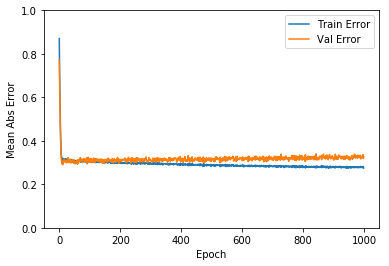

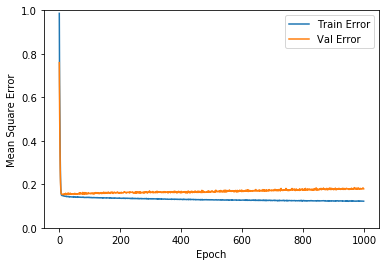

In [6]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error')
    plt.plot(hist['epoch'], hist['mean_absolute_error'],
               label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
               label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
  
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mean_squared_error'],
        label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'],
        label = 'Val Error')
    plt.ylim([0,1])
    plt.legend()
    plt.show()

plot_history(history)

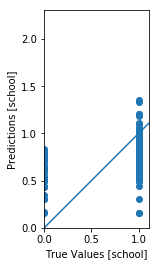

In [25]:
test_predictions = model.predict(cf)

plt.scatter([x[0] for x in answers], [x[0] for x in test_predictions])
plt.xlabel('True Values [school]')
plt.ylabel('Predictions [school]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

[[8.66489947e-01 7.54086256e-01 8.39596927e-01]
 [7.77371764e-01 4.84659553e-01 8.08502853e-01]
 [6.42825186e-01 5.76188982e-01 8.03967893e-01]
 [7.71530271e-01 5.38040459e-01 8.12805831e-01]
 [5.29679120e-01 3.09425950e-01 5.48915803e-01]
 [7.71530271e-01 5.38040459e-01 8.12805831e-01]
 [6.42825186e-01 5.76188982e-01 8.03967893e-01]
 [7.59932935e-01 3.27266365e-01 7.51856327e-01]
 [1.04569614e+00 6.00300729e-01 8.45353067e-01]
 [8.94846439e-01 7.32901931e-01 8.53891313e-01]
 [7.52029896e-01 4.02371883e-01 7.61526287e-01]
 [1.68057650e-01 1.12700355e+00 3.15554202e-01]
 [8.66489947e-01 7.54086256e-01 8.39596927e-01]
 [8.70620131e-01 5.92615187e-01 7.76730001e-01]
 [7.71530271e-01 5.38040459e-01 8.12805831e-01]
 [1.01706791e+00 4.15654145e-02 8.38266015e-01]
 [7.64875054e-01 6.03122652e-01 7.74638951e-01]
 [7.71530271e-01 5.38040459e-01 8.12805831e-01]
 [8.78412247e-01 6.09966278e-01 8.02018166e-01]
 [7.59932935e-01 3.27266365e-01 7.51856327e-01]
 [7.64875054e-01 6.03122652e-01 7.746389

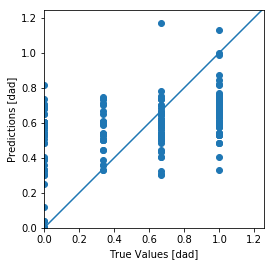

In [87]:
test_predictions = model.predict(cf)

plt.scatter([x[1] for x in answers], [x[1] for x in test_predictions])
plt.xlabel('True Values [dad]')
plt.ylabel('Predictions [dad]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

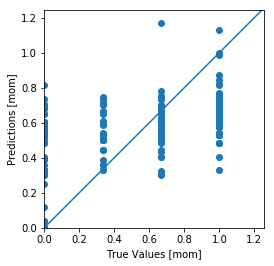

In [30]:
test_predictions = model.predict(cf)

plt.scatter([x[1] for x in answers], [x[1] for x in test_predictions])
plt.xlabel('True Values [mom]')
plt.ylabel('Predictions [mom]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

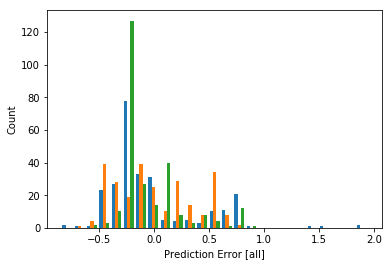

In [10]:
error = test_predictions - answers
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [all]")
_ = plt.ylabel("Count")

In [83]:
# a=feeling of safety at school (0 to 1)
# b=probability of dinner with family (0 to 1) also seen as nights per week divided by 7
# c=headaches frequently 0 no and 1 yes
# d=level of parent's education from less than HS (0) to college/graduate (1)
# e=living situation, "mom", "dad", "mgp", "pgp", "rel", "foster", "other"

def predict(a,b,c,d,e):
    pred_1=[a,b,c,d]
    if e=="mom":
        pred_2=[1,0,0,0,0,0,0]
    elif e=="dad":
        pred_2=[0,1,0,0,0,0,0]
    elif e=="mgp":
        pred_2=[0,0,1,0,0,0,0]
    elif e=="pgp":
        pred_2=[0,0,0,1,0,0,0]
    elif e=="rel":
        pred_2=[0,0,0,0,1,0,0]
    elif e=="foster":
        pred_2=[0,0,0,0,0,1,0]
    elif e=="other":
        pred_2=[0,0,0,0,0,0,1]
    pred=pred_1+pred_2
    pred=np.reshape(pred, (1,11))
    ans=(model.predict(pred))[0]
    school=100*(1-ans[0])
    school=round(school,3)
    dad=round(ans[1],3)
    mom=round(ans[2],3)
    print(str(school)+'% chance of misbehaving in school, '+str(dad)+' of 1 closeness to father, and '+str(mom)+' of 1 closeness to mother.')

In [101]:
predict(0.5,0.8,0,0.8,'dad')
predict(1,1,0,0.2,'mom')
predict(0.7,1,0.4,1,'foster')
print('')
predict(0.6,0,1,0.6,'mom')
predict(0,1,0.5,0.9,'mom')
predict(1,0.5,0,0,'mom')

29.366% chance of misbehaving in school, -0.459 of 1 closeness to father, and 0.852 of 1 closeness to mother.
12.306% chance of misbehaving in school, 0.561 of 1 closeness to father, and 0.828 of 1 closeness to mother.
-49.927% chance of misbehaving in school, -0.69 of 1 closeness to father, and 0.657 of 1 closeness to mother.

14.714% chance of misbehaving in school, 0.599 of 1 closeness to father, and 0.448 of 1 closeness to mother.
5.207% chance of misbehaving in school, 0.225 of 1 closeness to father, and 0.84 of 1 closeness to mother.
12.044% chance of misbehaving in school, 0.598 of 1 closeness to father, and 0.782 of 1 closeness to mother.
1.773% chance of misbehaving in school, 0.539 of 1 closeness to father, and 0.706 of 1 closeness to mother.
